In [17]:
!pip install konlpy

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/datasets/naverRatings.zip

-rw------- 1 root root 7903524 Mar 31 02:15 '/content/drive/My Drive/Colab Notebooks/datasets/naverRatings.zip'


In [21]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/naverRatings.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/naverRatings.zip
replace naverRatings.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: naverRatings.txt        


In [22]:
!ls -l naverRatings.txt

-rw-r--r-- 1 root root 19515078 May  4  2020 naverRatings.txt


In [23]:
train_data = pd.read_table('naverRatings.txt')
train_data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [24]:
print(len(train_data))

200000


In [25]:
print(train_data.isnull().values.any())

True


In [26]:
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [27]:
print(len(train_data))

199992


In [28]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]','')
train_data[:5]

,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1


In [29]:
train_data['document'].shape

(199992,)

In [30]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [31]:
%%time

from konlpy.tag import Okt

okt = Okt()
tokenized_data =[]

for sentence in train_data['document']:
  temp_X = okt.morphs(sentence, stem = True)
  temp_X = [word for word in temp_X if not word in stopwords]
  tokenized_data.append(temp_X)

CPU times: user 1h 6min 43s, sys: 6.36 s, total: 1h 6min 49s
Wall time: 1h 6min 49s


In [37]:
print(len(tokenized_data))

199992


In [38]:
print(tokenized_data.shape)

AttributeError: ignored

In [33]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))

리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 10.669446777871116


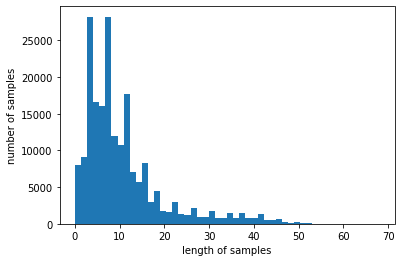

In [34]:
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [39]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size=100,  # embedding 차원 = 100차원
                 window=5, min_count=5, workers = 4, sg= 1 )

model.wv.vectors.shape

(17947, 100)

In [40]:
model.wv.most_similar('이병헌')

[('안성기', 0.8303495645523071),
 ('혼신', 0.8226784467697144),
 ('공리', 0.813854992389679),
 ('심은하', 0.8137903809547424),
 ('심은경', 0.8110928535461426),
 ('박상민', 0.8048771619796753),
 ('주진모', 0.8031278848648071),
 ('유다인', 0.7988041639328003),
 ('정윤희', 0.7923787832260132),
 ('최수종', 0.7902877330780029)]

In [41]:
model.wv.most_similar('로맨스')

[('멜로', 0.8008456230163574),
 ('판타지', 0.7497969269752502),
 ('로맨틱', 0.7414830923080444),
 ('환타지', 0.7359781861305237),
 ('러브스토리', 0.7285879254341125),
 ('코메디', 0.7233258485794067),
 ('정통', 0.7166587114334106),
 ('멘스', 0.7153242230415344),
 ('메디', 0.6979513168334961),
 ('로멘', 0.6918685436248779)]

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/datasets/ko_w2v.zip

-rw------- 1 root root 80596565 Mar 31 02:15 '/content/drive/My Drive/Colab Notebooks/datasets/ko_w2v.zip'


In [47]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/ko_w2v.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/ko_w2v.zip
  inflating: ko.bin                  
  inflating: ko.tsv                  


In [48]:
!ls -l ko.bin

-rw------- 1 root root 50697568 Dec 21  2016 ko.bin


In [49]:
import gensim

model = gensim.models.Word2Vec.load('ko.bin')

In [51]:
model.wv.most_similar('사랑')

[('슬픔', 0.7216662764549255),
 ('행복', 0.6759077310562134),
 ('절망', 0.6468985080718994),
 ('기쁨', 0.6458414196968079),
 ('이별', 0.6334798336029053),
 ('추억', 0.6320937275886536),
 ('인생', 0.6216273307800293),
 ('애정', 0.6206069588661194),
 ('연인', 0.6186063289642334),
 ('유혹', 0.5965287685394287)]

In [50]:
model.wv.most_similar('봄')

[('가을', 0.7626169919967651),
 ('여름', 0.6993100643157959),
 ('겨울', 0.6240803599357605),
 ('초여름', 0.6082375049591064),
 ('봄철', 0.5334632992744446),
 ('정월', 0.474109023809433),
 ('아침', 0.46838951110839844),
 ('섣달', 0.4663088917732239),
 ('월은', 0.46568232774734497),
 ('추수', 0.46235671639442444)]